In [2]:
import numpy as np
from PIL import Image

def convolve2D(image, kernel):
    """Convolves an image with a kernel."""
    # Get image and kernel dimensions
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Calculate padding dimensions
    pad_h, pad_w = kernel_h // 2, kernel_w // 2

    # Pad the image
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Initialize result
    result = np.zeros_like(image, dtype=np.float32)

    # Perform convolution
    for i in range(image_h):
        for j in range(image_w):
            result[i, j] = np.sum(padded_image[i: i + kernel_h, j: j + kernel_w] * kernel)

    return result

def sharpen_using_laplacian(image):
    """Sharpens an image using the Laplacian filter."""
    # Define the Laplacian kernel
    laplacian_kernel = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])

    # Get the Laplacian image
    laplacian = convolve2D(image, laplacian_kernel)

    # Sharpen the image
    sharpened = np.clip(image - laplacian, 0, 255)

    return sharpened

# Load the image
image = Image.open("/content/moon-blur.jpg").convert("L")
image_np = np.array(image)

# Sharpen the image
sharpened_image_np = sharpen_using_laplacian(image_np)

# Convert to PIL Image and save
sharpened_image = Image.fromarray(sharpened_image_np.astype(np.uint8))
output_path = "/content/moon-sharpen.jpg"
sharpened_image.save(output_path)

output_path


'/content/moon-sharpen.jpg'

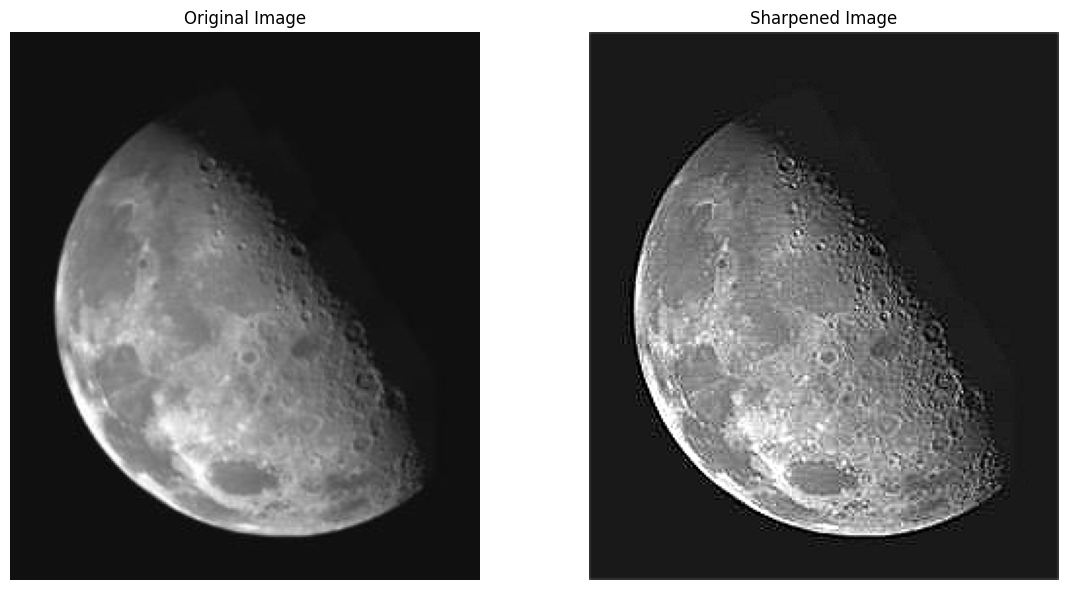

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Provided functions
def convolve2D(image, kernel):
    """Convolves an image with a kernel."""
    # Get image and kernel dimensions
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Calculate padding dimensions
    pad_h, pad_w = kernel_h // 2, kernel_w // 2

    # Pad the image
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Initialize result
    result = np.zeros_like(image, dtype=np.float32)

    # Perform convolution
    for i in range(image_h):
        for j in range(image_w):
            result[i, j] = np.sum(padded_image[i: i + kernel_h, j: j + kernel_w] * kernel)

    return result

def sharpen_using_laplacian(image):
    """Sharpens an image using the Laplacian filter."""
    # Define the Laplacian kernel
    laplacian_kernel = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])

    # Get the Laplacian image
    laplacian = convolve2D(image, laplacian_kernel)

    # Sharpen the image
    sharpened = np.clip(image - laplacian, 0, 255)

    return sharpened

# Load the image
image_path = "/content/moon-blur.jpg"
image = Image.open(image_path).convert("L")
image_np = np.array(image)

# Sharpen the image
sharpened_image_np = sharpen_using_laplacian(image_np)

# Plotting the original and sharpened images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image_np, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()
